In [1]:
import pandas as pd 
import numpy as np 

import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

## I. Import Data

In [2]:
data = pd.read_csv('adult.data.csv')
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
print('Number of Data Point:', len(data))

Number of Data Point: 32561


## II. Preprocess

#### Checking for Duplicate Records

In [4]:
n_duplicates = data[data.duplicated()]
print(f"We seem to have {len(n_duplicates)} duplicate records in our database.")

We seem to have 24 duplicate records in our database.


In [5]:
n_duplicates.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K


In [6]:
# Remove duplicate records
no_dup = data.drop_duplicates(keep='first') #keeping the first entry
print(f"We have now have {len(no_dup)} records in our dataframe, with {len(no_dup[no_dup.duplicated()])} duplicated records")

We have now have 32537 records in our dataframe, with 0 duplicated records


#### Missing Values

Text(0.5, 1.0, 'Missing Values')

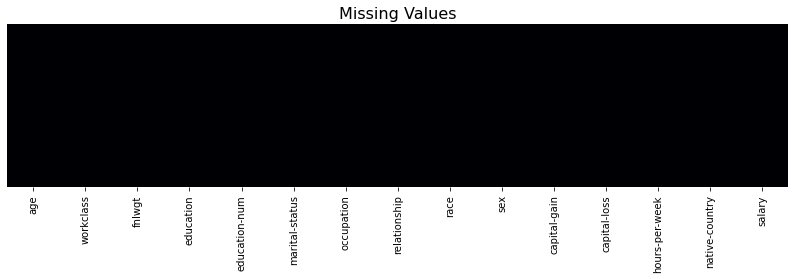

In [7]:
plt.figure(figsize=(14,3))
sns.heatmap(no_dup.isnull(), cbar=False, cmap='magma', yticklabels=False)
plt.title('Missing Values', size=16)

There appears to be no missing values within our dataset.

## III. Exploratory Data Analysis

In [8]:
df = no_dup.copy()

In [9]:
#add a binary coloumn for the salary

df['b_salary'] = df['salary'].map({'<=50K':0,'>50K':1})
df.tail(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,b_salary
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K,1


In [10]:
df.groupby("marital-status").age.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
marital-status,,,,,
Divorced,4441,42,43.042783,10.401943,90
Married-AF-spouse,23,30,32.478261,11.610613,75
Married-civ-spouse,14970,42,43.247361,12.058083,90
Married-spouse-absent,418,40,40.578947,12.397677,80
Never-married,10667,25,28.150558,9.992995,90
Separated,1025,38,39.354146,10.835977,90
Widowed,993,60,58.975831,12.345555,90


The standard deviation being consistent regardless of marital status. Widows have the highest average age at 59 compared with the other groups.

We can visualise this with the locality, spread and skewness of the group by utilising a box plot.

<AxesSubplot:xlabel='marital-status', ylabel='age'>

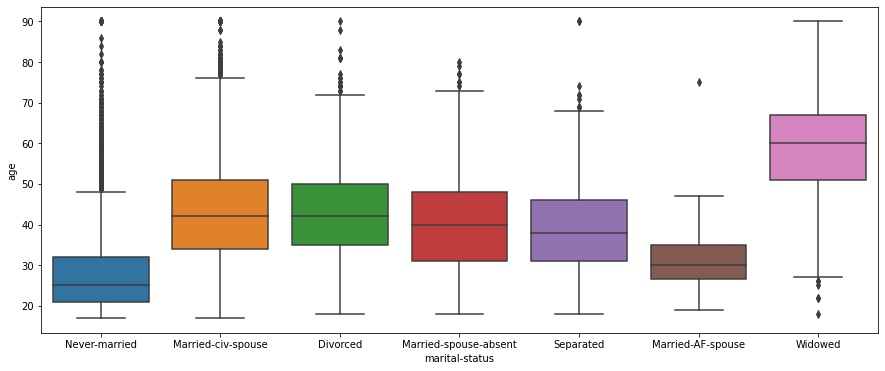

In [11]:
plt.figure(figsize=(15,6))
sns.boxplot(data= df, x='marital-status', y='age')

/Users/folara/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Age Range according to Salary'}, xlabel='salary', ylabel='age'>

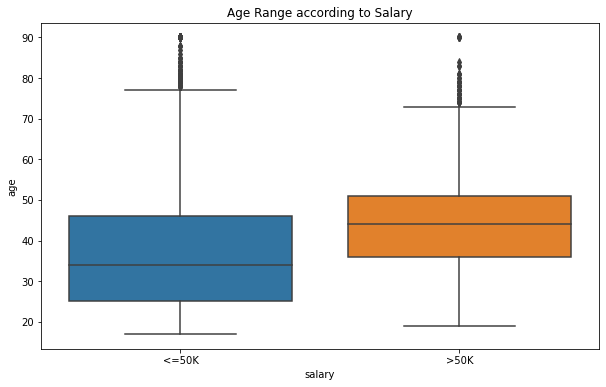

In [12]:
plt.figure(figsize=(10,6))
plt.title('Age Range according to Salary')
sns.boxplot(df.salary, df.age)

In [13]:
# Find the % of people who have a salary of more than 50K based on sex and education level

gen_ed = df.groupby(['sex', 'education']).b_salary.agg(np.mean).reset_index()
gen_ed = gen_ed.sort_values('b_salary', ascending=False).reset_index()
gen_ed = gen_ed[['sex', 'education', 'b_salary']]
gen_ed

,sex,education,b_salary
0,Male,Prof-school,0.787190
1,Male,Doctorate,0.782875
2,Male,Masters,0.657673
3,Female,Doctorate,0.581395
4,Male,Bachelors,0.503882
5,Female,Prof-school,0.456522
6,Female,Masters,0.333955
7,Male,Assoc-voc,0.333333
8,Male,Assoc-acdm,0.323529
9,Male,Some-college,0.265402


The table above shows the percentage of people who earn more than $50k/yr based on their sex and education level. Males that have attended a professional school are have the highest probability of earning more than 50K. They are 78.7% likely to earn more than 50k followed by male doctorate and male master holders who have a probability 78.2% and 65% respectfully. 

Both male and female's whose highest level of education is pre-school education, have a 0% probability to earn $50K or more.

This is in line with our initial expectation, students that have attained the highest education level tend to have the highest salary and thus a higher probability of earning more than $50K.

## IV. Feature Selection

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV

**Feature selection is the process of reducing the number of input variables when developing predictive models. Feature selection is important as irrelevant or noisy features can pollute a metric which will in turn negatively impact the performance and accuracy of a given metric.**

**There are three methods to select the appropriate features this includes the filter, wrapper and embedded**

#### Method 1: Filter Method

With the filter method, features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable. For continuous features we could use a persons' correlation and if we a dataset with categorical features we would use chi-square.

One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If one of the features of the regression model are highly correlated than we need to keep one and drop the rest. We can visualise the data through a correlation coefficient plot.

<AxesSubplot:title={'center':'Correlation Coefficeint plot'}>

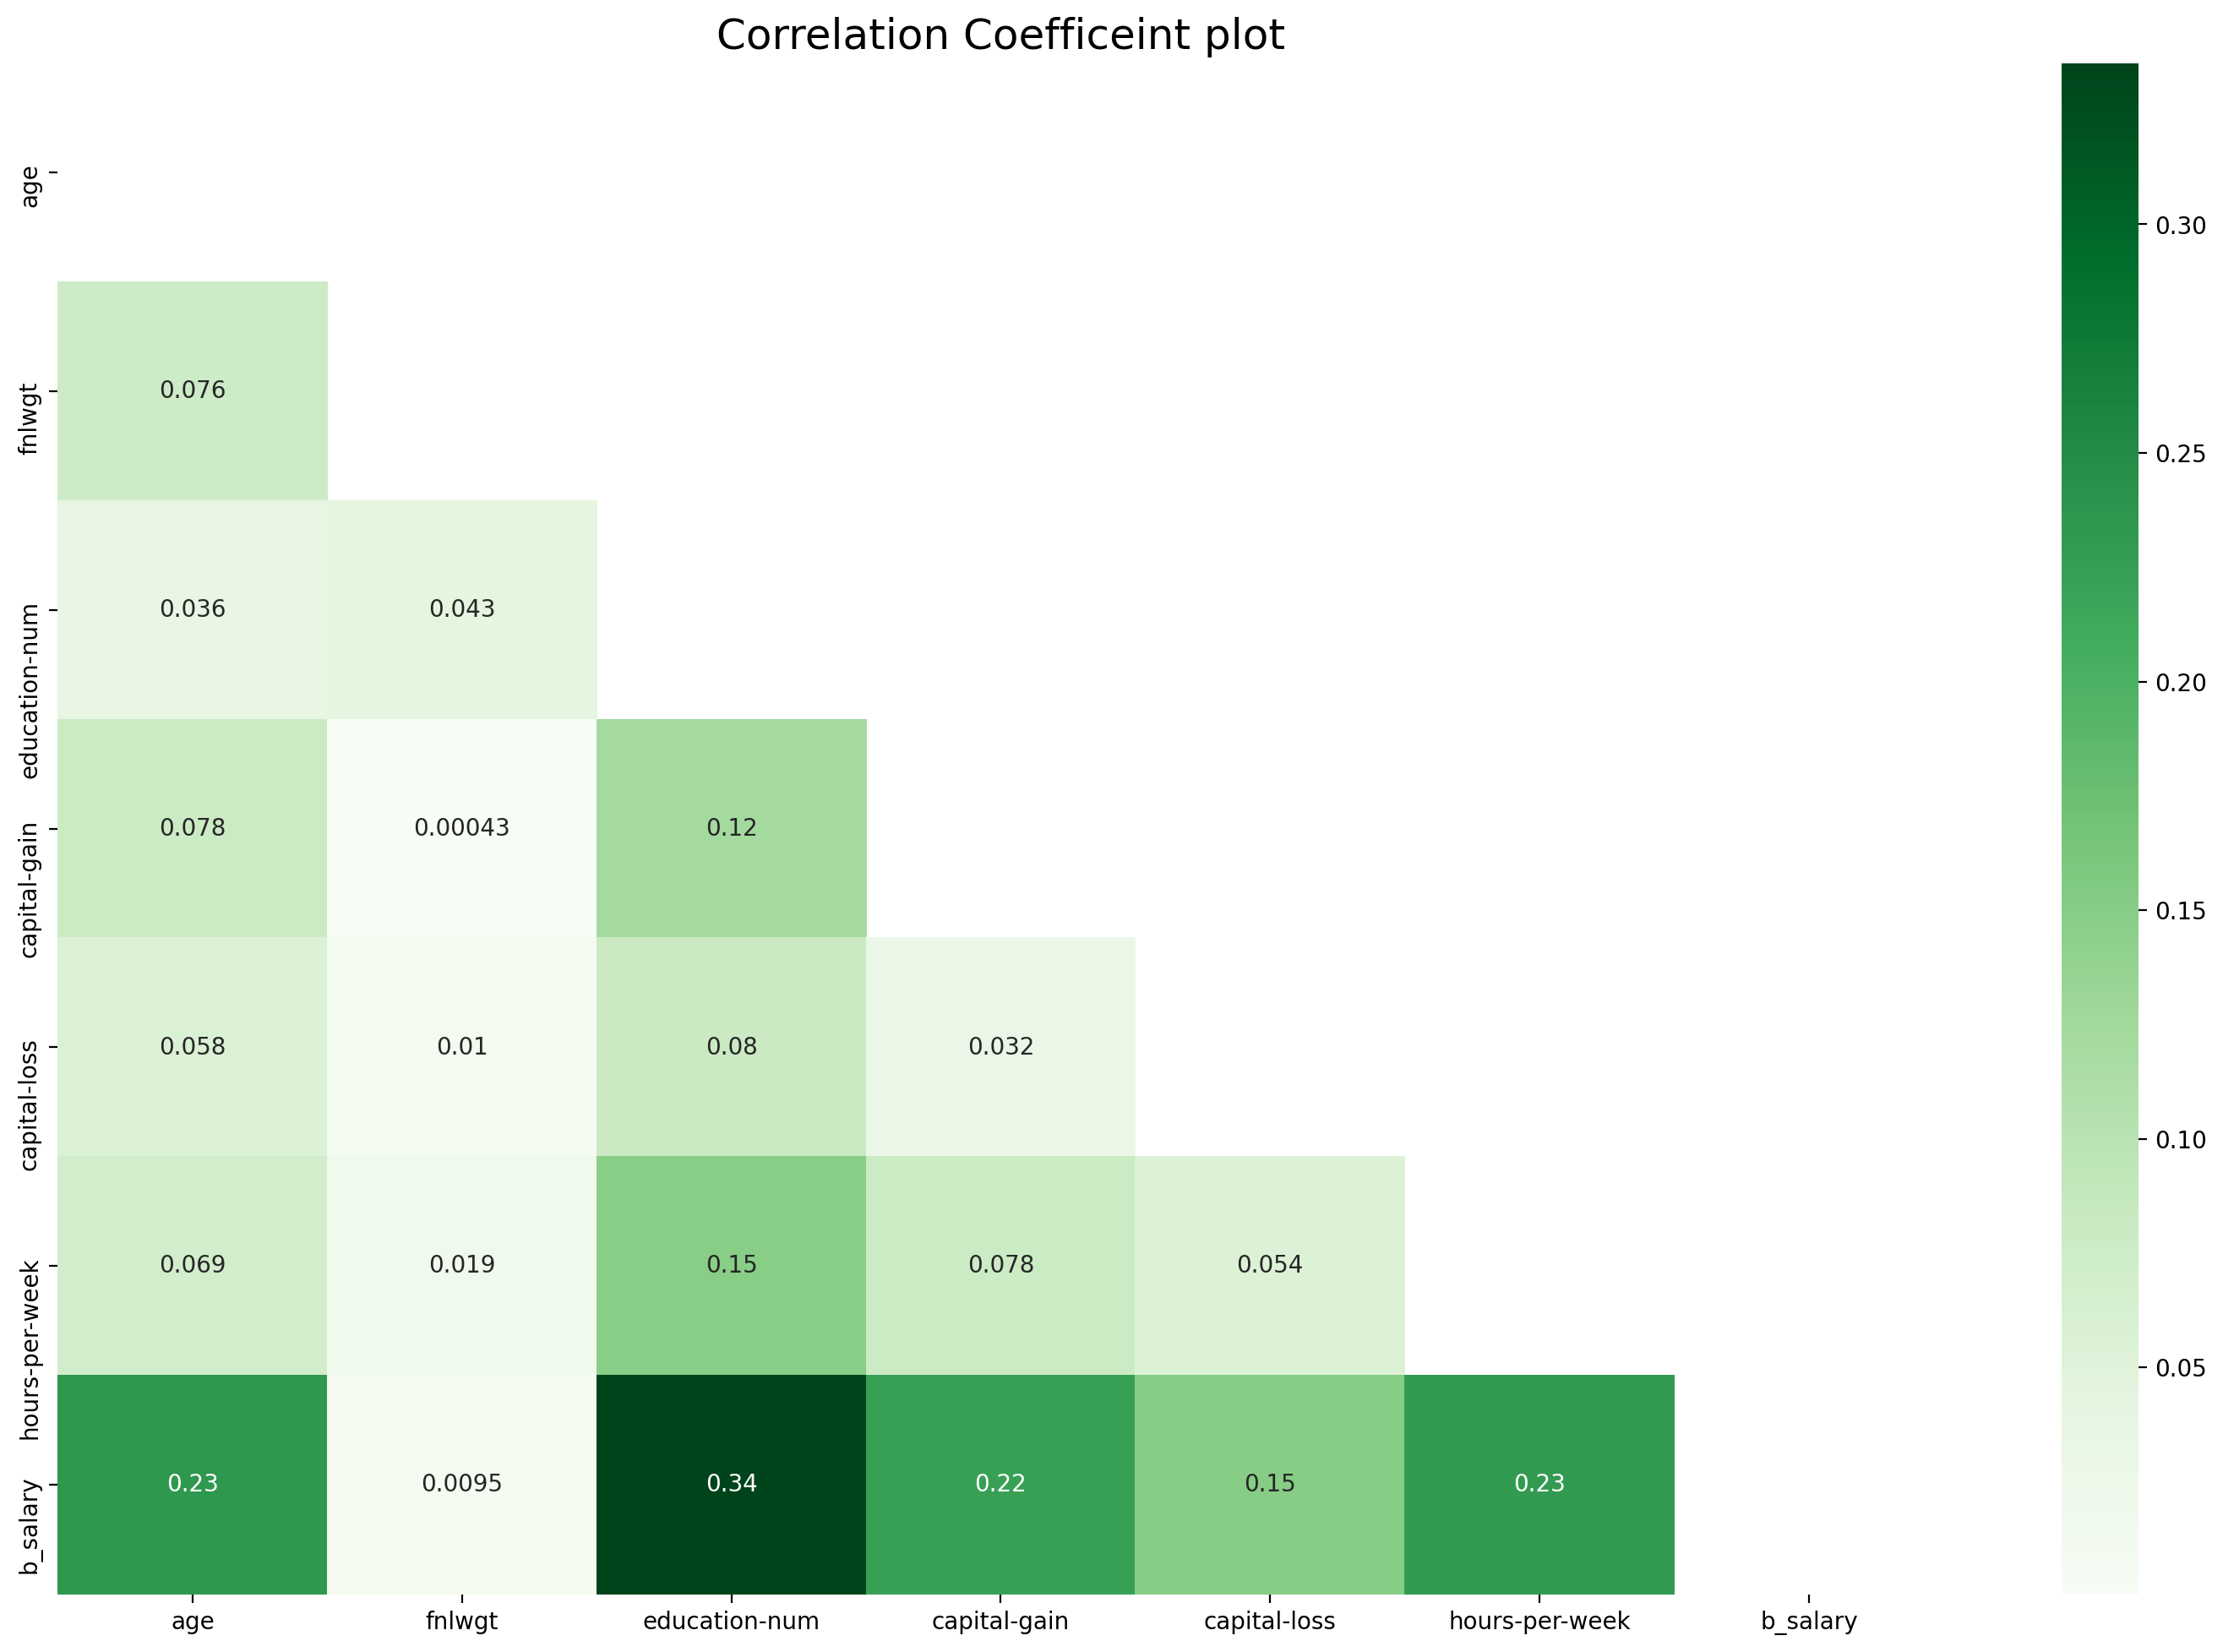

In [15]:
plt.figure(figsize=(18,12), dpi=200)
plt.title('Correlation Coefficeint plot', fontsize= 18)

corr_mx = abs(df.corr()) #absolute changes for pearson correlation 
matrix = np.triu(corr_mx) 
sns.heatmap(corr_mx, mask=matrix, cmap="Greens", annot = True)

#see metrics that are negatively correlated

The correlation coefficient has values between -1 to 1
* A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
* A value closer to 1 implies stronger positive correlation
* A value closer to -1 implies stronger negative correlation

**The figure above displays the correlation coefficient plot for each metric.** It is evident that education number and people who earn more than $50K have the most number of highly correlated metrics. A correlation of 0.3 is not strong enough relationship for us to drop the education number feature. 

➕ For the filter method there are other alternative such as the chi-square test and fisher score. 

- **Chi-Square Test:** A chi-square test is used in statistics to test the independence of two events. When the two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value.



- **Fisher Score:** A fisher test is used to determine if there are non random associations between two categorical variables.

#### Method 2: Wrapper Method

The wrapper method that involves using a subset of the features and training the model. We then decide to add or remove features based upon the inferences of the model. Forward feature selection is an example of the wrapper method. This is an iterative method where we start with the best performing variable against the target and then add additional metrics are added. This could be forward, backward or recursive selection. This is the most intensive method as we need to train many ML models.



#### Method 3: Embedded Method

The embedded method involves elements of both the filter and wrapper method. Popular examples of these methods are LASSO and RIDGE regression which both have a penalisation function to reduce overfitting. For this example, I will use a lasso regression that penalises its coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

In order to conduct a lasso regression, we need to analyse the relationship between the feature metrics and target variables. We have already converted the target variable into a binary range. We can use this field as the target range

In [16]:
lasso_df = df.drop(['b_salary','salary'], axis = 1)
n_cols = list(lasso_df.select_dtypes(exclude='object').columns)
n_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [17]:
lasso_df = pd.get_dummies(lasso_df)
lasso_df.head(3)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
scaler = StandardScaler()
lasso_df[n_cols] = scaler.fit_transform(lasso_df[n_cols])
lasso_df.head(2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
# create input and target variables
X = lasso_df
y = df['b_salary']

X.shape, y.shape

((32537, 108), (32537,))

####  Sklearn's test train split to reduce the sample size
Rather than testing on all the data points we can focus on a small sample size to conduct our analysis. Splitting the dataset into a training and test dataset is essential for unbiased evaluation.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [21]:
reg = LassoCV()
reg.fit(X, y)
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated " +  str(sum(coef == 0)) + " variables")

Lasso picked 51 variables and eliminated 57 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

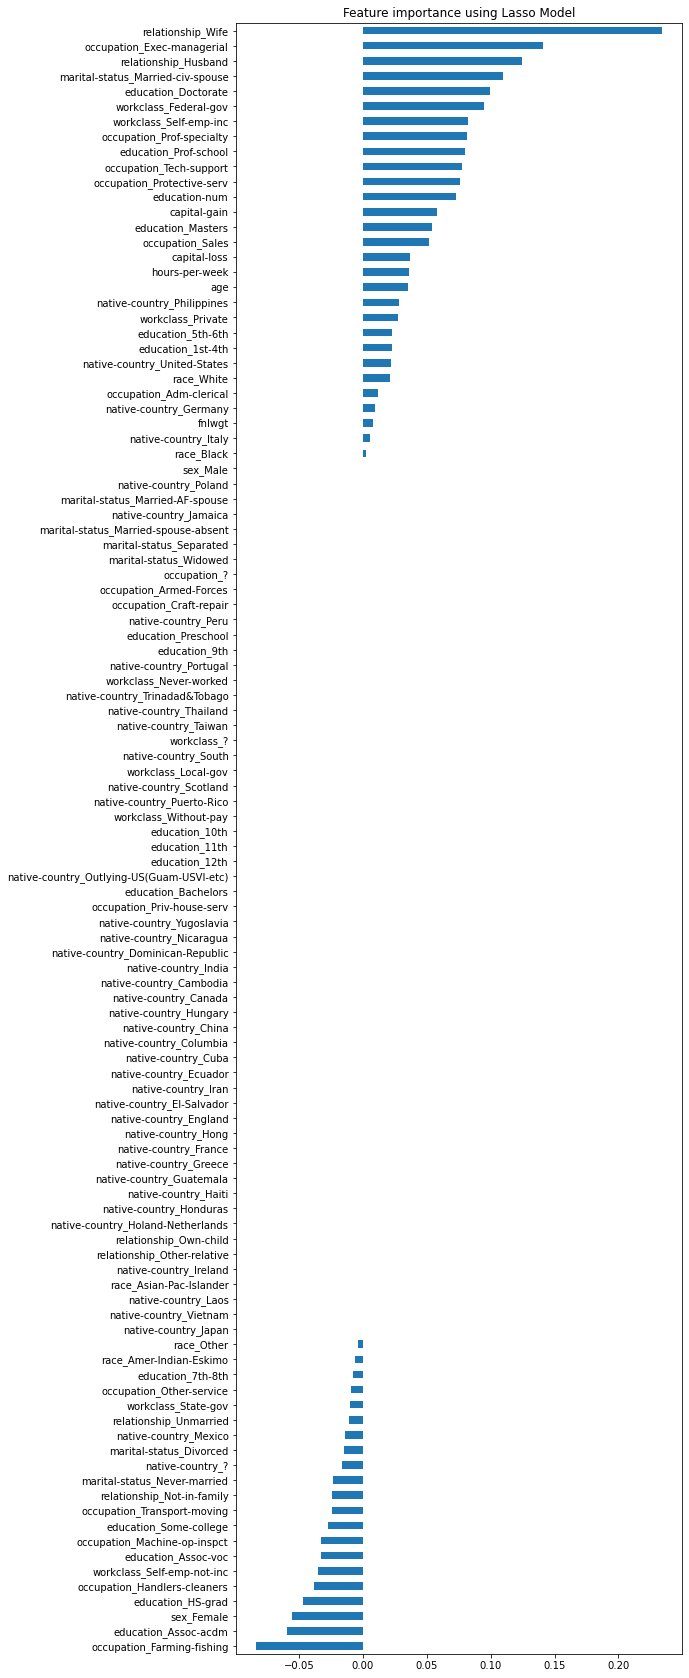

In [22]:
#View the included and eliminated variables
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8, 30.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

A coefficient of zero indicates no relationship between the predictor and the response, since zero multiplied by anything is zero. Features with a non-zero indicator can be introduced into the model. Eliminating redundant variables or irrelevant variables may/may not lead to a negligible loss in our accuracy but makes it a very efficient model under many constraints.

➕ **Random Forest Importance** is an alternative embedded method. When training a tree, it is possible to compute how much each feature decreases the impurity. The more a feature decreases the impurity, the more important the feature is. In random forests, the impurity decrease from each feature can be averaged across trees to determine the final importance of the variable.

## Conclusion

In this notebook, we analysed and discovered trends within the 1994 Census public database. We also went walked through how to implement feature selection in Python by utilising the Filter and Embedded method via scikit-learn.

Within this notebook, I discussed more way of selecting feature such as the Chi-Square Test, Fisher Test and the Random Forest Importance method. In future notebooks I will go through them in detail 😊